1. 라이브러리 로드

In [11]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2. 데이터 로드

In [12]:
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [13]:
df.shape

(8790, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [15]:
# 수치형 정보 확인

df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [16]:
# 결측치 확인
# 결측치가 없는 것을 확인할 수 있습니다
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## 2. Feature Exploration

2.1) type 항목 분석

In [17]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

수치상으로 Movie의 수가 더 많은 것을 알 수 있습니다.
좀 더 한눈에 볼 수 있게 pie 와 bar plot을 사용해 시각화를 합니다.

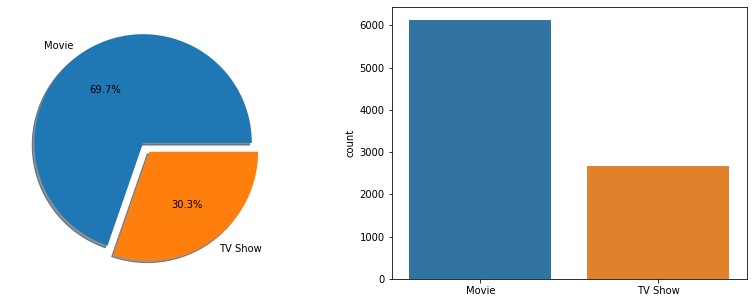

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
labels = ['Movie', 'TV Show']
 
# Pie Plot
df['type'].value_counts().plot.pie(ax=ax[0], explode=[0,0.1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='')
 
# Count Plot
sns.countplot(data=df, x='type', ax=ax[1])
ax[1].set(xlabel='', xticklabels=labels)
 
plt.show()

영화의 비율이 압도적으로 높습니다.

넷플릭스에서 영화 콘텐츠에 더 많은 투자를 하였다는 것을 알 수 있습니다.

다만 TV Show의 숫자는 에피소드 별이 아닌 TV쇼 별이기에 영상 숫자 자체는 TV Show가 더 많을 수도 있습니다.

2.2) country 항목 분석     

In [78]:
#넷플릭스의 콘텐츠를 많이 만든 국가 10개를 살펴 봅니다.
df['country'].value_counts().head(10)

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

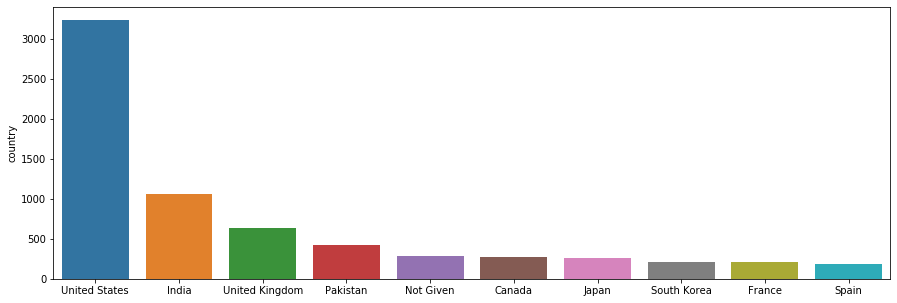

In [95]:
#위 데이터를 시각화 해줍니다.

top10_country= df['country'].value_counts().head(10)

plt.figure(figsize=(15,5))
sns.barplot(x= top10_country.index, y=top10_country)
plt.show()

#미국이 가장 많은 컨텐츠를 만들었고, 인도, 영국 등 영어권 국가들이 상위권을 차지한 걸 알 수 있습니다.

2.3) type 항목 분석     

In [96]:
#각 국가 별 어떤 type의 컨텐츠를 만들었는지를 살펴보겠습니다.

In [106]:
country_type_20 = df.groupby(['country','type'])[ 'type'].count().reset_index(name='count').sort_values('count', ascending=False).head(20)
country_type_20

#넷플릭스에 한해 미국이 가장 많은 영화를 만들었고, 인도가 두번 째, 영국이 3번 째 임을 알 수 있습니다.
#TV Show는 미국이 가장 많이,파키스탄이 2위, 영국이 3위임을 알 수 있습니다.

,country,type,count
130,United States,Movie,2395
47,India,Movie,976
131,United States,TV Show,845
128,United Kingdom,Movie,387
87,Pakistan,TV Show,350
84,Not Given,Movie,257
129,United Kingdom,TV Show,251
15,Canada,Movie,187
60,Japan,TV Show,172
110,South Korea,TV Show,165


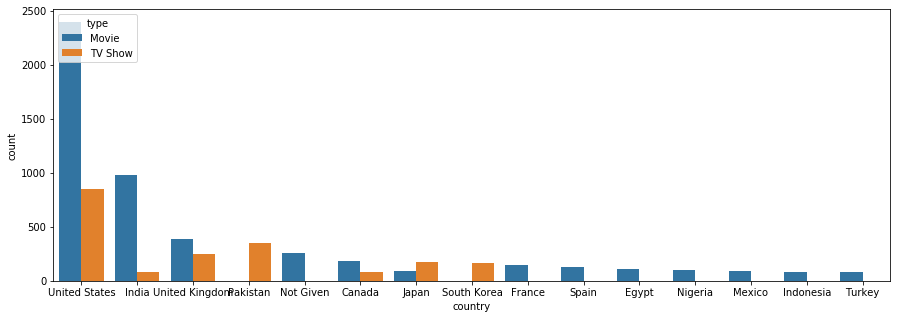

In [111]:
#위 데이터를 시각화 해줍니다.

plt.figure(figsize=(15,5))
sns.barplot(x =country_type_20.reset_index()['country'], y=country_type_20.reset_index()['count'],
            hue =  country_type_20.reset_index()['type'])

#미국이 영화, tv쇼 모두 가장 많은 넷플릭스 컨텐츠를 보유한 것을 알 수 있습니다.
#상위 국가들에 한해 한국만이 넷플릭스에 영화 보다 tv쇼를 많이 보유하고 있음을 알 수 있습니다.

2.3) listed_in(장르) 항목 분석     

In [112]:
#listed_in항목을 이용하여 어떤 장르가 인기가 있는지를 확인하겠습니다.
# TV Show 와 Movie 두개의 dataframe을 각각 만들어서 각각의 장르 데이터를 분석해 보겠습니다.
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

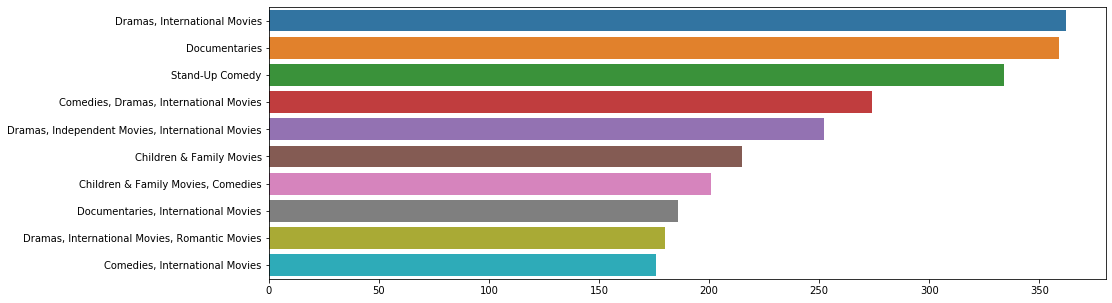

In [123]:
#영화들 중 어떤 장르가 많이 만들어졌는지를 확인하겠습니다.
plt.figure(figsize=(15,5))
sns.barplot(y = df_movies["listed_in"].value_counts().head(10).index,
            x = df_movies["listed_in"].value_counts().head(10).values)
plt.show()

#드라마나 다큐멘터리가 가장 많이 만들어졌음을 알 수 있습니다.

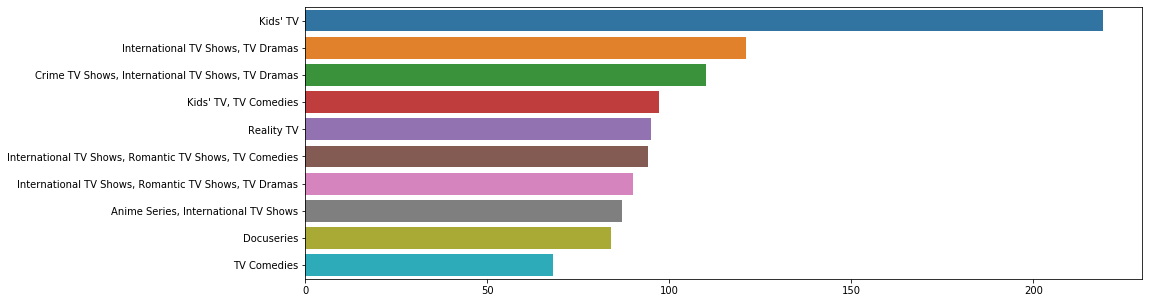

In [124]:
#tv쇼들 중 어떤 장르가 많이 만들어졌는지를 확인하겠습니다.
plt.figure(figsize=(15,5))
sns.barplot(y = df_tv["listed_in"].value_counts().head(10).index,
            x = df_tv["listed_in"].value_counts().head(10).values)
plt.show()

#아동용 tv프로그램이 가장 많이 만들어졌고, 2번 째로는 드라마 항목이 많이 만들어졌음을 알 수 있습니다.
#흥미롭게도 영화와 달리 다큐멘터리가 적게 만들어졌음을 알 수 있습니다.

2.3) release_year 항목 분석

In [129]:
#연도 별 어떤 type의 컨텐츠들이 만들어졌는지 살펴보겠습니다.
release_year_df= df.groupby(['release_year','type'])['type'].count().reset_index(name='count')
release_year_df

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


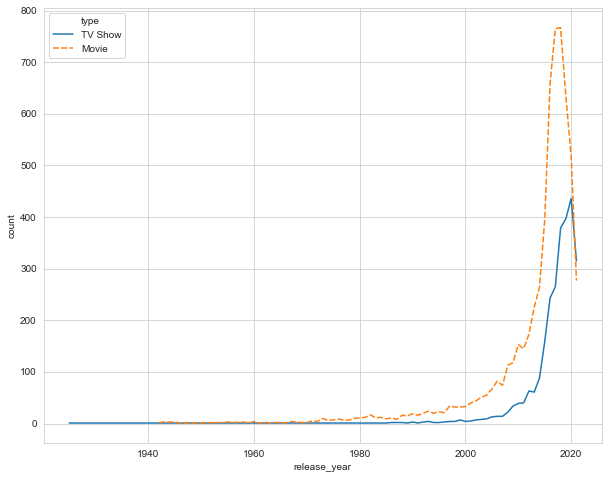

In [137]:
# TV와 영화 모두 2018-2019년 사이에 만들어진 컨텐츠가 가장 많음을 알 수 있습니다.

plt.figure(figsize = (10,8))
gfg = sns.lineplot(x ="release_year", y ="count", hue="type" ,style="type", data = release_year_df)
plt.show()